In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Volkswagen India/Emotion Dataset/


# Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Volkswagen India/Emotion Dataset


In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Volkswagen India/Emotion Dataset/


# Import the necessary packages
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Volkswagen India/Emotion Dataset


/content/drive/MyDrive/Volkswagen India/Test Image
Face 0 saved to /content/drive/MyDrive/Volkswagen India/Test Image/cropped_face_0.jpg


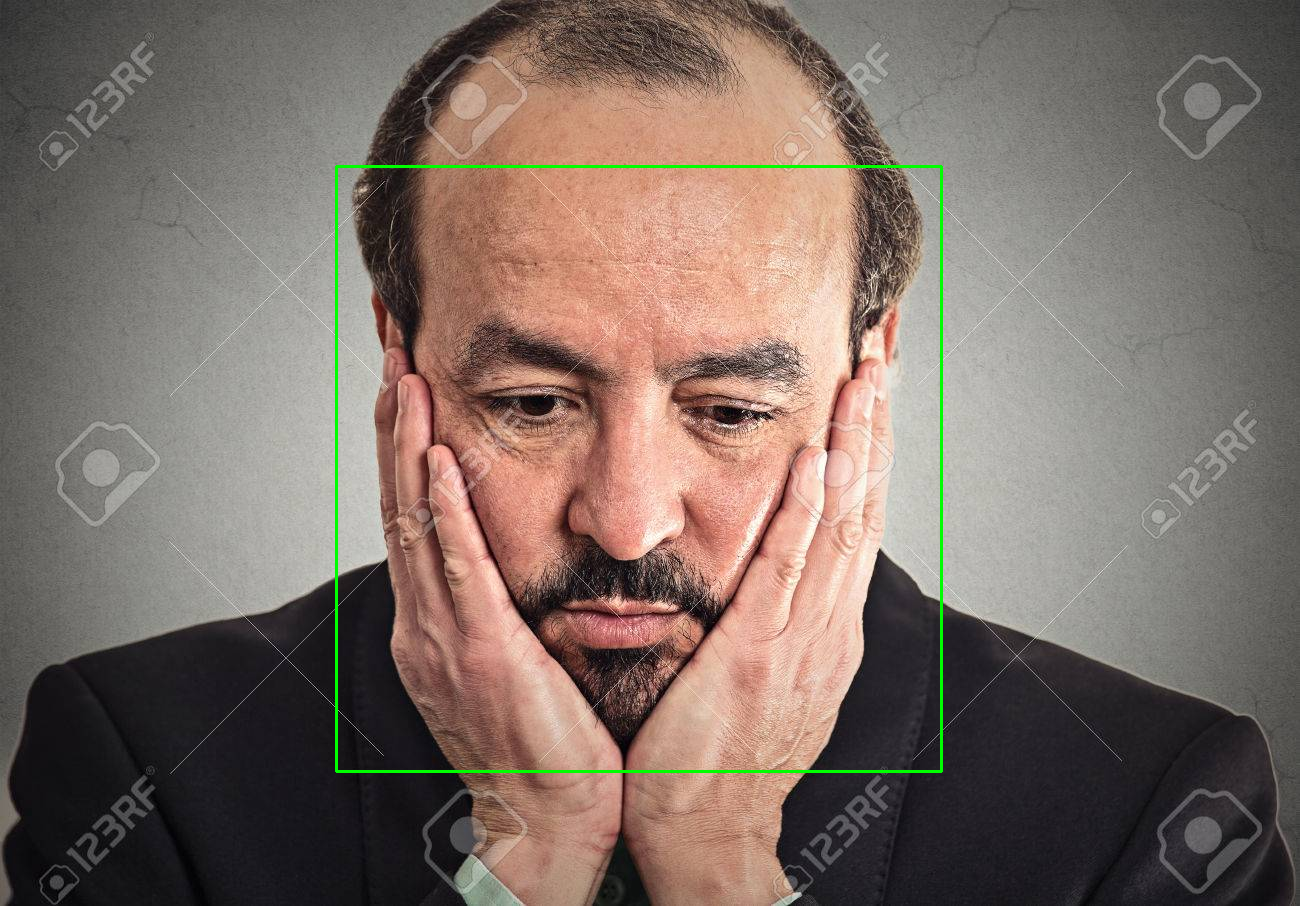

In [3]:
# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
%cd /content/drive/MyDrive/Volkswagen India/Test Image/
image_path = 'sad.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces and crop and save them
for i, (x, y, w, h) in enumerate(faces):
    # Crop the face from the image
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face to the specified directory
    output_path = f'/content/drive/MyDrive/Volkswagen India/Test Image/cropped_face_{i}.jpg'
    cv2.imwrite(output_path, cropped_face)
    print(f'Face {i} saved to {output_path}')

# Display the original image with rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Show the image with faces highlighted using cv2_imshow
cv2_imshow(image)

/content/drive/MyDrive/Volkswagen India/Test Image


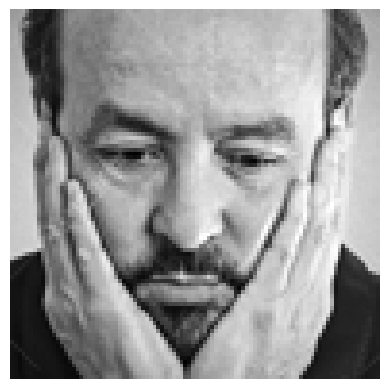

/content/drive/MyDrive/Volkswagen India/Emotion Dataset


In [4]:
# Open the image
%cd /content/drive/MyDrive/Volkswagen India/Test Image/
image = Image.open("cropped_face_0.jpg")  # Replace "happy_girl.jpg" with the path to your image

# Resize the image to 96x96 pixels
new_size = (96, 96)
resized_image = image.resize(new_size)

# Convert the resized image to grayscale and then to a NumPy array
image_array = np.array(resized_image.convert("L"), dtype=np.uint8)  # Use uint8 data type for image data

# Save the grayscale image using Pillow
grayscale_image = Image.fromarray(image_array)
grayscale_image.save("grayscale_image.jpg")  # Replace with the desired output file name

# Display the grayscale image
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

%cd /content/drive/MyDrive/Volkswagen India/Emotion Dataset/

/content/drive/MyDrive/Volkswagen India/Emotion Dataset
1/1 [==============================] - 1s 1s/step


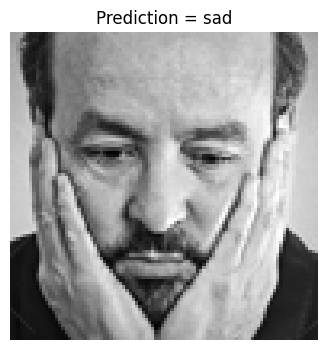

In [5]:
image_array = image_array.reshape(96, 96, 1)
image_array = image_array/255
test_picture  = np.zeros((1, 96, 96, 1))
test_picture[0] = image_array
%cd /content/drive/MyDrive/Volkswagen India/Emotion Dataset/
model = load_model('FacialExpression_weights.hdf5')  # Replace with your model file
predicted_classes = np.argmax(model.predict(test_picture), axis=-1)
#y_true = np.argmax(y_Test, axis=-1)

index_to_display = 0
# Create a single subplot
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(test_picture[index_to_display].reshape(96, 96), cmap='gray')

label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}
axes.set_title('Prediction = {}'.format(label_to_text[predicted_classes[index_to_display]]))
axes.axis('off')

plt.subplots_adjust(wspace=1)
plt.show()
